In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import glob
import tools21cm as t2c
import cmasher as cmr
plt.rcParams['font.size'] = 12
save = False
plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':10})

In [2]:
zc = 63
N = 128
boxsize = 14 # kpc
extent = (0,boxsize,0,boxsize)

In [3]:
files_c2ray = [
    'c2ray_results/grey/xfrac3D_8.835.bin',
    'c2ray_results/Teff=5e3/xfrac3D_8.835.bin',
    'c2ray_results/Teff=5e4/xfrac3D_8.835.bin',
    'c2ray_results/Teff=1e5/xfrac3D_8.835.bin'
]
files_pyc2ray = [
    'pyc2ray_results/grey/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=5e3/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=5e4/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=1e5/xfrac_8.835.pkl'
]

In [4]:
slices_c2ray = np.empty((4,N,N))
slices_pyc2ray = np.empty((4,N,N))
meanxfrac_c2ray = np.empty(4)
meanxfrac_pyc2ray = np.empty(4)

for i,f in enumerate(files_c2ray):
    x = t2c.XfracFile(f).xi
    slices_c2ray[i] = x[:,:,zc]
    meanxfrac_c2ray[i] = x.mean()
    
for i,f in enumerate(files_pyc2ray):
    with open(f,"rb") as f:
        x = pkl.load(f)
    slices_pyc2ray[i] = x[:,:,zc]
    meanxfrac_pyc2ray[i] = x.mean()

In [5]:
print(meanxfrac_c2ray)
print(meanxfrac_pyc2ray)

[0.09488065 0.09503048 0.09583101 0.09492813]
[0.09488056 0.0950304  0.09583087 0.09492792]


In [6]:
err = np.empty((4,N,N))
for u in range(4):
    err[u] = (slices_pyc2ray[u]-slices_c2ray[u]) / slices_c2ray[u]*100

In [25]:
vmin_x = 2e-3
vmax_x = 1
cmap_x = 'jet'#'cmr.guppy_r'

vmin_r = -0.01
vmax_r = 0.01
cmap_r = 'RdBu'

def xfracplot(x,ax):
    return ax.imshow(x,norm='log',cmap=cmap_x,vmin=vmin_x,vmax=vmax_x,extent=extent)

def residplot(err,ax):
    return ax.imshow(err,cmap=cmap_r,vmin=vmin_r,vmax=vmax_r,extent=extent)

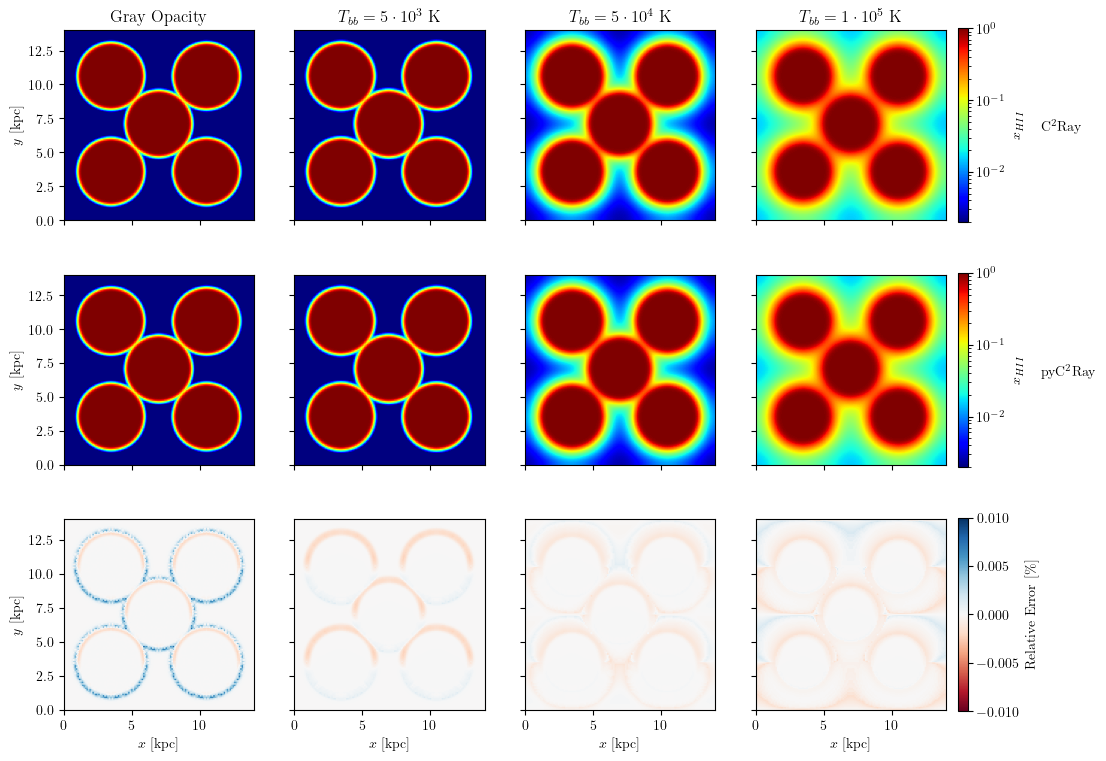

In [51]:
fig, ax = plt.subplots(3,4,sharex=True,sharey=True,figsize=(12,9),width_ratios=[1,1,1,1.25])

ax[2,0].set_xlabel('$x$ [kpc]')
ax[2,1].set_xlabel('$x$ [kpc]')
ax[2,2].set_xlabel('$x$ [kpc]')
ax[2,3].set_xlabel('$x$ [kpc]')

ax[0,0].set_ylabel('$y$ [kpc]')
ax[1,0].set_ylabel('$y$ [kpc]')
ax[2,0].set_ylabel('$y$ [kpc]')

ax[0,0].set_title("Gray Opacity")
ax[0,1].set_title("$T_{bb} = 5\cdot 10^3$ K")
ax[0,2].set_title("$T_{bb} = 5\cdot 10^4$ K")
ax[0,3].set_title("$T_{bb} = 1\cdot 10^5$ K")

spacing = 21
ax[0,3].text(spacing,6.6,"C$^2$Ray")
ax[1,3].text(spacing,6.6,"pyC$^2$Ray")
#ax[2,3].text(spacing,6.6,"")

im1 = xfracplot(slices_c2ray[0],ax[0,0])
xfracplot(slices_c2ray[1],ax[0,1])
xfracplot(slices_c2ray[2],ax[0,2])
xfracplot(slices_c2ray[3],ax[0,3])

im2 = xfracplot(slices_pyc2ray[0],ax[1,0])
xfracplot(slices_pyc2ray[1],ax[1,1])
xfracplot(slices_pyc2ray[2],ax[1,2])
xfracplot(slices_pyc2ray[3],ax[1,3])

im3 = residplot(err[0],ax[2,0])
residplot(err[1],ax[2,1])
residplot(err[2],ax[2,2])
residplot(err[3],ax[2,3])

cb1 = fig.colorbar(im1,ax=ax[0,3],shrink=0.95)
cb1.set_label("$x_{HII}$")
cb2 = fig.colorbar(im2,ax=ax[1,3],shrink=0.95)
cb2.set_label("$x_{HII}$")
cb3 = fig.colorbar(im3,ax=ax[2,3],shrink=0.95)
cb3.set_label("Relative Error [\%]")

In [22]:
fig.savefig("comparison.eps",bbox_inches='tight')

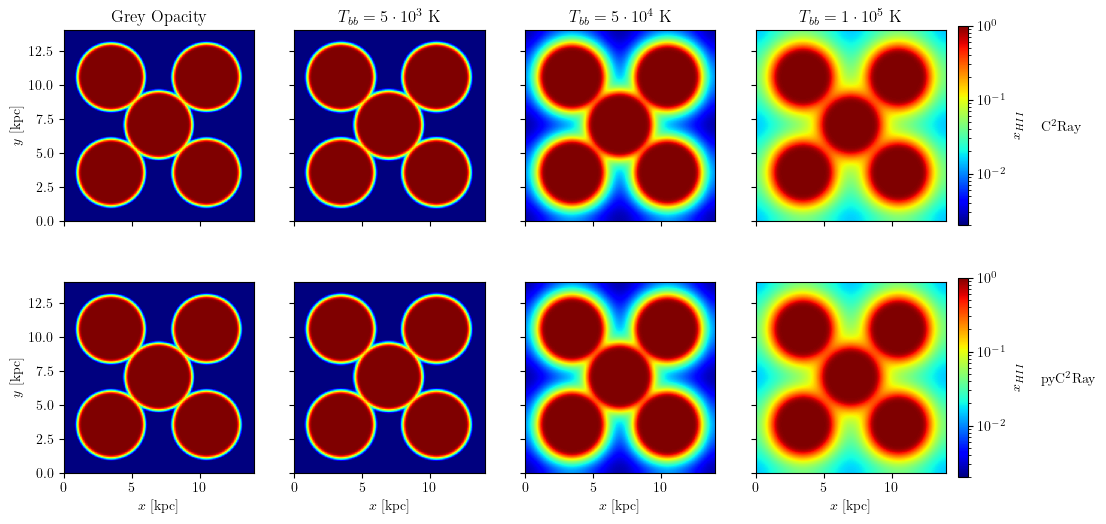

In [20]:
fig, ax = plt.subplots(2,4,sharex=True,sharey=True,figsize=(12,6),width_ratios=[1,1,1,1.25])

ax[1,0].set_xlabel('$x$ [kpc]')
ax[1,1].set_xlabel('$x$ [kpc]')
ax[1,2].set_xlabel('$x$ [kpc]')
ax[1,3].set_xlabel('$x$ [kpc]')

ax[0,0].set_ylabel('$y$ [kpc]')
ax[1,0].set_ylabel('$y$ [kpc]')

ax[0,0].set_title("Grey Opacity")
ax[0,1].set_title("$T_{bb} = 5\cdot 10^3$ K")
ax[0,2].set_title("$T_{bb} = 5\cdot 10^4$ K")
ax[0,3].set_title("$T_{bb} = 1\cdot 10^5$ K")

spacing = 21
ax[0,3].text(spacing,6.6,"C$^2$Ray")
ax[1,3].text(spacing,6.6,"pyC$^2$Ray")
#ax[2,3].text(spacing,6.6,"")

im1 = xfracplot(slices_c2ray[0],ax[0,0])
xfracplot(slices_c2ray[1],ax[0,1])
xfracplot(slices_c2ray[2],ax[0,2])
xfracplot(slices_c2ray[3],ax[0,3])

im2 = xfracplot(slices_pyc2ray[0],ax[1,0])
xfracplot(slices_pyc2ray[1],ax[1,1])
xfracplot(slices_pyc2ray[2],ax[1,2])
xfracplot(slices_pyc2ray[3],ax[1,3])


cb1 = fig.colorbar(im1,ax=ax[0,3],shrink=0.95)
cb1.set_label("$x_{HII}$")
cb2 = fig.colorbar(im2,ax=ax[1,3],shrink=0.95)
cb2.set_label("$x_{HII}$")

In [11]:
print(c2ray_slices[1].mean())

NameError: name 'c2ray_slices' is not defined

In [ ]:
5725496123028.4443 / 2080842725911.47

In [ ]:
2176481410501.4280 / 2080842725911.47

In [ ]:
2083702204861.9336 / 2080842725911.47

In [46]:
avgdens = 1e-3
xc = np.linspace(0,14,N)
X,Y,Z = np.meshgrid(xc,xc,xc)
shadow_pos = np.array([44,44,64])
shadow_radius = 8
shadow_fact = 10
ndens = avgdens*np.ones((N,N,N))
for i in range(0,N):
    for j in range(0,N):
        for k in range(0,N):
            if (i-shadow_pos[0])**2 + (j-shadow_pos[1])**2 + (k-shadow_pos[2])**2 < shadow_radius**2:
                ndens[i,j,k] = shadow_fact*avgdens

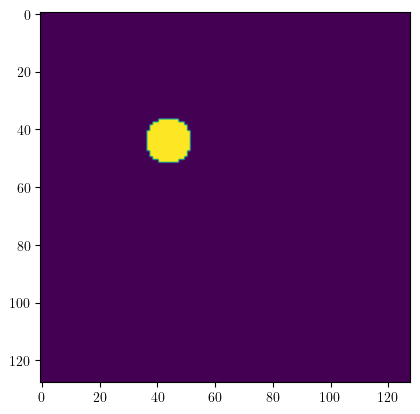

In [47]:
plt.imshow(ndens[:,:,64])

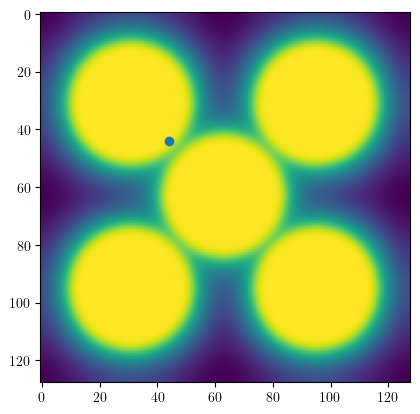

In [48]:
plt.imshow(slices_c2ray[2],norm='log')
plt.scatter(shadow_pos[0],shadow_pos[1])